# Customer shopping

## Librearías

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

from typing import List

%matplotlib inline
plt.style.use('ggplot')

In [18]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

## Funciones utiles

### Gráficas

In [19]:
def pie_plot(data: pd.DataFrame, 
             col: str,
             title: str,
             savefig: bool = False) -> None:
    """Genera un gráfico de torta basado en una columna de un DataFrame.

    Args:
        data (pd.DataFrame): El DataFrame que contiene los datos.
        col (str): El nombre de la columna a graficar.
        title: Título de la gráfica.
        savefig: Opcional. Si se quiere guardar la imagen 
         en output.

    Returns:
        None: Muestra el gráfico de pastel.

    """
    plt.figure(figsize=(8, 5))
    datos = data[col]
    labels = data.index
    
    # Se agregan colores con plt.cm estableciendo un color para cada espacio en el 
    # diagrama, por eso se usa un linspace de la misma magnitud de los datos.
    colors = plt.cm.RdYlGn(np.linspace(0.1, 0.7, len(datos)))
    
    # Generación del diagrama circular
    patches, texts = plt.pie(datos, labels=labels, colors=colors)

    # Para que siempre se vea como un círculo
    plt.axis('equal')
    
    # Se eliminan las líneas
    plt.rcParams['patch.linewidth'] = 0
    
    # Estimación porcentaje
    porcent = 100 * datos / sum(datos)
    # Lista que será expuesta en la legenda
    labels = ['{0} - {1:1.1f} %'.format(i,j) for i, j in zip(labels, porcent)]
    
    # Se genera la legenda
    # bbox_to_anchor especifica en coordenadas la posición de la legenda
    plt.legend(patches, labels, bbox_to_anchor=(-0.1, 1.), fontsize=8)
    
    # Agregar título
    plt.title(title)
    
    # Guardar la figura si savefig es True y se proporciona una ruta
    if savefig:
        plt.savefig(os.path.join('..', 'output', f'{title}.png'), bbox_inches='tight')
        
    plt.show()

In [20]:
def bar_subplots(df: pd.DataFrame, 
                 columns: List[str],
                 title: str,
                 savefig: bool = False) -> None:
    """Genera diagramas de barras para contar la cantidad 
     según columna especificada.

    Args:
        df: DataFrame que contiene los datos de los hurtos.
        columns: Lista de columnas del DataFrame a 
         mostrar en los diagramas de barras.
        title: Título de la gráfica.
        savefig: Opcional. Si se quiere guardar la imagen 
         en output.

    """
    num_columnas = len(columns)
    num_filas = num_columnas // 2 + num_columnas % 2 

    fig, axs = plt.subplots(num_filas, 2, figsize=(12, 4 * num_filas))
    fig.tight_layout(pad=4.0)
    
    fig.suptitle(title, fontsize=16)

    for i, columna in enumerate(columns):
        ax = axs[i // 2, i % 2] if num_filas > 1 else axs[i]
        valores = df[columna].value_counts()

        ax.bar(valores.index, valores.values)
        ax.set_title(f"Transacciones {columna}")
        plt.xlabel(None)
        ax.yaxis.set_visible(False)
        
        ax.set_xticks(range(len(valores.index))) 
        ax.set_xticklabels(valores.index, rotation=20) 

        for p in ax.patches:
            ax.annotate(
                '{:,.0f}'.format(int(p.get_height())).replace(",", "."),
                (p.get_x() + p.get_width() / 2.0, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=10)

        for spine in ax.spines:
            ax.spines[spine].set_visible(False)
    
    if savefig:
        plt.savefig(os.path.join('..', 'output', f'{title}.png'), bbox_inches='tight')
    plt.show()

In [21]:
def bar_plot(df: pd.DataFrame, 
             column: str,
             title: str,
             savefig: bool = False) -> None:
    """Genera un gráfico de barras para visualizar datos de una 
     columna específica en un DataFrame.

    Args:
        df (pd.DataFrame): El DataFrame que contiene los datos.
        column (str): El nombre de la columna que se desea 
         visualizar.
         title: Título de la gráfica.
        savefig (bool, optional): Indica si se debe guardar 
         la imagen del gráfico. Por defecto es False.

    """
    ax = df[column].plot(kind='bar', figsize=(8, 6))
    
    for p in ax.patches:
            ax.annotate(
                '{:,.0f}'.format(int(p.get_height())).replace(",", "."),
                (p.get_x() + p.get_width() / 2.0, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=10)
            
    for spine in ax.spines:
            ax.spines[spine].set_visible(False)
            
    plt.xlabel(None)
    ax.yaxis.set_visible(False)
        
    plt.title(f'Transactions by {title}')
    
    if savefig:
        plt.savefig(
            os.path.join('..', 'output', f'Transactions by {title}.png'),
            bbox_inches='tight')
        
    plt.show()

# Exploración de datos

## Carga de datos

In [22]:
path = os.path.join('data', 'customer_shopping_data.csv')
shopping_data = pd.read_csv(path)

In [23]:
shopping_data.head(2)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul


In [24]:
shopping_data.shape

(99457, 10)

In [25]:
shopping_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [26]:
shopping_data.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


## Visualización de características

El conjunto de datos "Customer Shopping Dataset" contiene información sobre las transacciones de compras realizadas en una tienda minorista en Turquía desde el año 2021 hasta el 2023. Contiene 99.457 registros y 10 columnas, las cuales se dividen en numéricas y categóricas para realizar el análiis de cada una de las características. 

In [27]:
shopping_categorical = shopping_data.select_dtypes(include=['object'])
shopping_numeric = shopping_data.select_dtypes(include=[np.number])

### Características categóricas

In [28]:
gender = shopping_data.groupby('gender').agg({'customer_id': 'count'})

In [29]:
gender

,customer_id
gender,
Female,59482
Male,39975


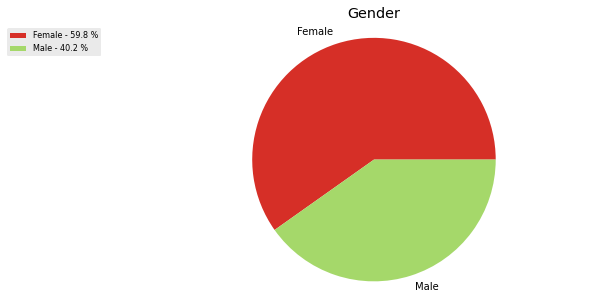

In [30]:
pie_plot(
    data=gender, 
    col='customer_id',
    title='Gender',
    savefig=True)

* En la gráfica anterior se evidencia que son las mujeres las que tienen una mayor participación en las compras con una diferencia de $19.507$ transacciones de diferencia.

In [31]:
payment_method = shopping_data.groupby('payment_method').agg({'customer_id': 'count'})

In [32]:
payment_method

,customer_id
payment_method,
Cash,44447
Credit Card,34931
Debit Card,20079


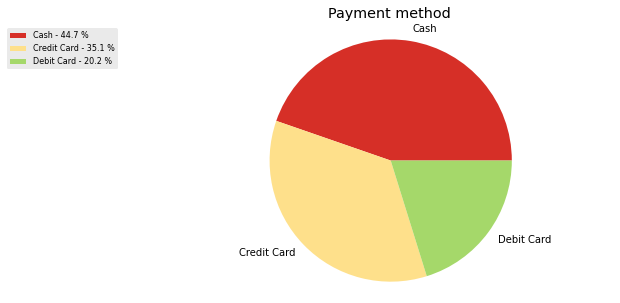

In [33]:
pie_plot(
    data=payment_method, 
    col='customer_id',
    title='Payment method',
    savefig=True)

* La mayoría de las compras registradas en el data set se realizan con efectivo, teniendo una participación del 44.75%, seguido de las tarjetas crédito y débito con 35.1% y 20.2% respectivamente.

In [34]:
shopping_mall = shopping_data.groupby('shopping_mall').agg({'customer_id': 'count'})

In [35]:
shopping_mall = shopping_mall.sort_values(by='customer_id', ascending=False)

In [36]:
shopping_mall['% participacion'] = shopping_mall['customer_id'] / shopping_mall['customer_id'].sum()

In [37]:
shopping_mall['acumulado'] = shopping_mall['% participacion'].cumsum()

In [38]:
shopping_mall

,customer_id,% participacion,acumulado
shopping_mall,,,
Mall of Istanbul,19943,0.200519,0.200519
Kanyon,19823,0.199312,0.399831
Metrocity,15011,0.150930,0.550761
Metropol AVM,10161,0.102165,0.652925
Istinye Park,9781,0.098344,0.751269
Zorlu Center,5075,0.051027,0.802296
Cevahir AVM,4991,0.050182,0.852479
Forum Istanbul,4947,0.049740,0.902219
Viaport Outlet,4914,0.049408,0.951627


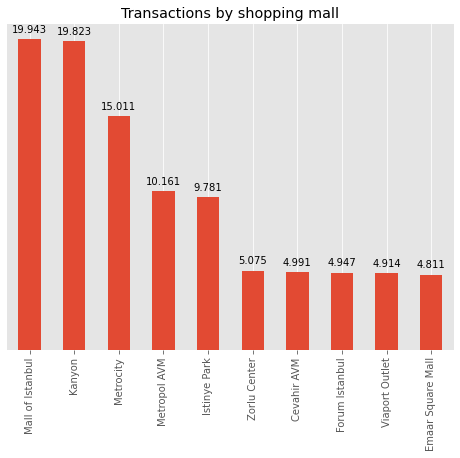

In [39]:
bar_plot(df=shopping_mall, column='customer_id', title='shopping mall')

* Se evidencia que un poco más de la mitad del total de las transacciones realizadas en el periodo de tiempo estudiado, es decir el 55.07% se centra en 3 centros comerciales: Mall of Istanbul, Kanyon y Metrocity.

In [40]:
category = shopping_data.groupby('category').agg({'customer_id': 'count'})

In [41]:
category = category.sort_values(by='customer_id', ascending=False)

In [42]:
category['% participacion'] = category['customer_id'] / category['customer_id'].sum()

In [43]:
category['acumulado'] = category['% participacion'].cumsum()

In [44]:
category

,customer_id,% participacion,acumulado
category,,,
Clothing,34487,0.346753,0.346753
Cosmetics,15097,0.151794,0.498547
Food & Beverage,14776,0.148567,0.647114
Toys,10087,0.101421,0.748535
Shoes,10034,0.100888,0.849422
Souvenir,4999,0.050263,0.899685
Technology,4996,0.050233,0.949918
Books,4981,0.050082,1.000000


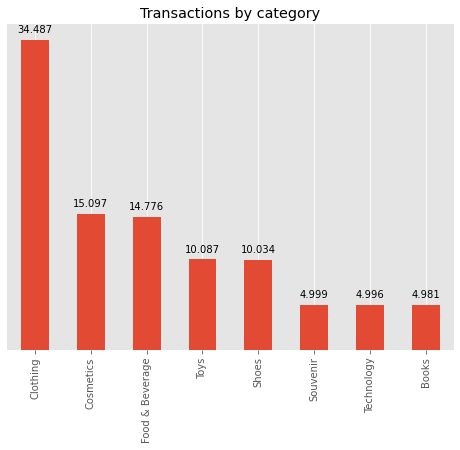

In [45]:
bar_plot(df=category, column='customer_id', title='category')

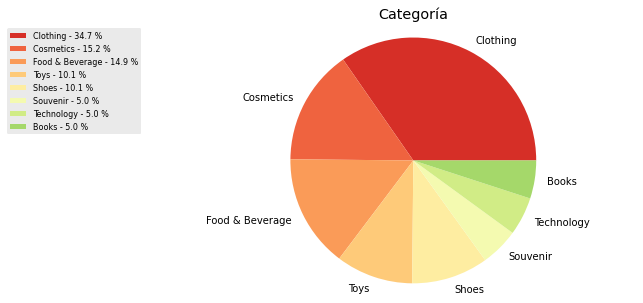

In [46]:
pie_plot(
    data=category.sort_values('customer_id', ascending=False), 
    col='customer_id',
    title='Categoría',
    savefig=True)

* Debido a que el obetivo de esta monografia es tratar de predecir las categorias de compra, es importante realizar un análisis de la distribución de los datos de las 8 categorias, ya que el 35% de las transacciones es de ropa y 5 de las categorias, no alcanzan una participación mayor al 10% de los datos.

### Características numéricas

* Se seleccionan las columnas numéricas para escalar y tener un diagrama de cajas con las caracteríscas en la misma escala

In [47]:
shopping_numeric.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


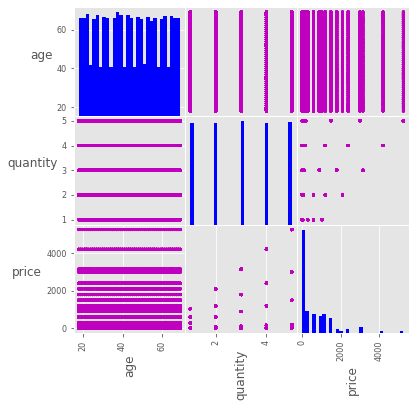

In [48]:
axes = pd.plotting.scatter_matrix(
    shopping_numeric,
    alpha=0.7,
    figsize=(6, 6),
    range_padding=0.1,
    diagonal='hist',
    color='m',
    hist_kwds={
        'bins': 30, 
        'color': 'blue'
    }
)

for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
plt.show()

In [49]:
shopping_data['category'].unique()

array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

In [50]:
# shopping_data['total_price'] = shopping_data['price'] * shopping_data['quantity']

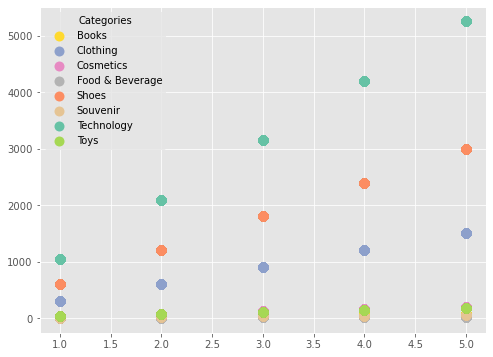

In [51]:
color_palette = sns.color_palette("Set2")

colors_category = {
    'Technology': color_palette[0], 
    'Shoes': color_palette[1], 
    'Clothing': color_palette[2],
    'Cosmetics': color_palette[3], 
    'Toys': color_palette[4], 
    'Books': color_palette[5],
    'Souvenir': color_palette[6], 
    'Food & Beverage': color_palette[7]
}

plt.figure(figsize=(8, 6))
for category, group in shopping_data.groupby('category'):
    plt.scatter(
        group['quantity'], 
        group['price'], 
        label=category, 
        color=colors_category[category], 
        s=100)
    
plt.legend(title='Categories')
plt.show()